# Scraping weather forecase
In the following web scrapping, we used two methods that allowed us to easily analyze HTML pages and extract all kinds of data from the web.

### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure. 

# Benguerir city

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests #get the HTML content from a web page
from urllib.request import urlopen #he urllib.request module is used to open URLs
from bs4 import BeautifulSoup #he Beautiful Soup package is used to extract data from html files. 'Version 4'

##### Specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [41]:
url = "https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"
html = urlopen(url)


###### The soup object allows  to extract interesting information about the weather in Benguerir  such as getting the title of the page as shown  the text of the webpage 

In [42]:
soup = BeautifulSoup(html, 'lxml')# Using  soup to parse the html 
#type(soup)

#title = soup.title
#print(title)

<title data-react-helmet="true">Ben Guerir, Marrakech-Safi 10 jours de prévisions météo -The Weather Channel | Weather.com</title>


In [4]:
#text = soup.get_text()

<!DOCTYPE html>
<html dir="ltr" lang="fr-MA">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Sois bien préparé avec les 10 jours de prévisions précises pour Ben Guerir, Marrakech-Safi avec températures, risques de précipitation de The Weather Channel et Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="Ben Guerir, Marrakech-Safi 
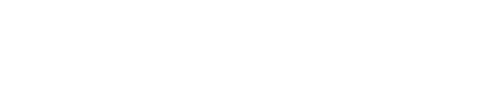
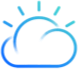

In [77]:
#print(soup.prettify())

In [50]:
items = soup.find_all('h3', class_ = 'DetailsSummary--daypartName--kbngc')
dates = [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'DetailsSummary--lowTempValue--2tesQ')
mins = [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'DetailsSummary--highTempValue--3PjlX')
maxs = [item.get_text() for item in items]
items= soup.find_all('span', class_= 'DetailsSummary--extendedData--307Ax')
weathers = [item.get_text() for item in items]
items= soup.find_all('div', class_= 'DetailsSummary--precip--1a98O')
rains= [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'Wind--windWrapper--3Ly7c undefined')
winds = [item.get_text() for item in items]

In [154]:
import pandas as pd
df1 = pd.DataFrame({'date': dates,
                  'max': maxs,
                  'min': mins,
                  'weather': weathers,
                  'rain': rains,
                  'wind': winds})
df1

,date,max,min,weather,rain,wind
0,Ce soir,--,11°,Très nuageux,Rain15%,SO 8 km/h
1,sam. 17,19°,8°,Peu nuageux,Rain15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,Rain15%,ESE 11 km/h
3,lun. 19,23°,7°,Plutôt ensoleillé,Rain7%,E 12 km/h
4,mar. 20,23°,7°,Peu nuageux,Rain7%,SSO 14 km/h
5,mer. 21,22°,7°,Ensoleillé,Rain7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,Rain10%,ENE 13 km/h
7,ven. 23,22°,6°,Ensoleillé,Rain7%,SSO 13 km/h
8,sam. 24,21°,7°,Plutôt ensoleillé,Rain7%,S 13 km/h
9,dim. 25,21°,8°,Peu nuageux,Rain10%,SSE 15 km/h


# Tanger city

In [165]:
url2 = "https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
html = urlopen(url2)
soup = BeautifulSoup(html)

select the phase from which we want to extract information including the divs and the id concerned

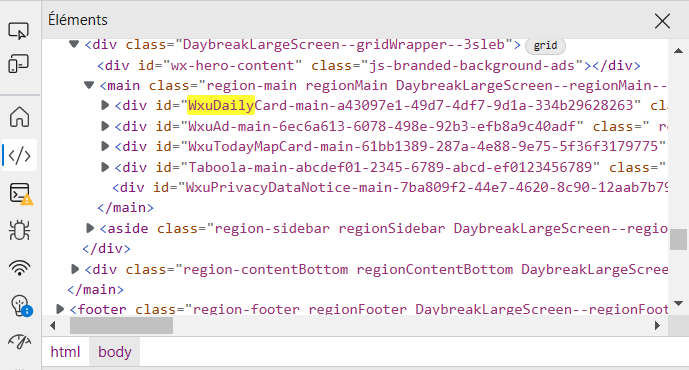

In [166]:
all_data = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
all_data
summaries = container.find_all('summary')
summaries

[<summary class="Disclosure--Summary--3GiL4 DaypartDetails--Summary--3Fuya Disclosure--positionShowOpenSummaryContainer--2EoiN Disclosure--hideBorderOnSummaryOpen--3_ZkO"><div class="DaypartDetails--DetailSummaryContent--1-r0i Disclosure--SummaryDefault--2XBO9 Disclosure--positionShowOpenSummary--2r38t"><div class="Accessibility--visuallyHidden--H7O4p"><div class="DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF" data-testid="DetailsSummary"><h3 class="DetailsSummary--daypartName--kbngc" data-testid="daypartName">Ce soir</h3><div class="DetailsSummary--temperature--1kVVp" data-testid="detailsTemperature"><span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">--</span><span data-testid="lowTempValue">/<span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">15°</span></span></div><div class="DetailsSummary--condition--2JmHb" data-testid="wxIcon"><svg aria-hidden="true" class="DetailsSummary--wxIcon--1_A0F Icon--ic

In [167]:
def get_information(summary):
    df2 = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            df2.append(span.get_text())
        break 
    return df2

In [199]:
df2= [get_information(summaries[day]) for day in range(15)]
columns = ['day', 'temperature_max', 'temperature_min', 'state','percentage_value', 'wind_speed']
data = pd.DataFrame(df2)
data

,0,1,2,3,4,5
0,--,/15°,15°,Averses,81%,SO 12 km/h
1,18°,/12°,12°,Averses,80%,SO 10 km/h
2,20°,/15°,15°,Ensoleillé,14%,E 23 km/h
3,21°,/14°,14°,Peu nuageux,12%,E 18 km/h
4,21°,/16°,16°,Averses dans l'après-midi,59%,SE 13 km/h
5,19°,/13°,13°,Averses dans la matinée,47%,SO 9 km/h
6,19°,/12°,12°,Plutôt ensoleillé,12%,NNE 8 km/h
7,19°,/13°,13°,Ensoleillé,12%,S 8 km/h
8,19°,/13°,13°,Peu nuageux,24%,S 8 km/h
9,20°,/14°,14°,Peu nuageux,24%,ESE 15 km/h


We should add the day columns 

In [111]:
view = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = view.find_all('h3')
days[:3]

[<h3 class="DetailsSummary--daypartName--kbngc" data-testid="daypartName">Ce soir</h3>,
 <h3 class="DailyContent--daypartName--3emSU"><span class="DailyContent--daypartDate--3VGlz">ven. 16</span> | Nuit</h3>,
 <h3 class="DetailsSummary--daypartName--kbngc" data-testid="daypartName">sam. 17</h3>]

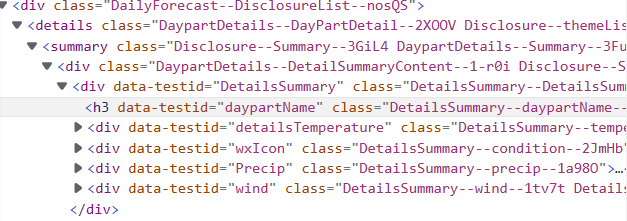

In [123]:
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_days:
            get_days.append(temp.get_text())
get_days

['ven. 16',
 'sam. 17',
 'dim. 18',
 'lun. 19',
 'mar. 20',
 'mer. 21',
 'jeu. 22',
 'ven. 23',
 'sam. 24',
 'dim. 25',
 'lun. 26',
 'mar. 27',
 'mer. 28',
 'jeu. 29',
 'ven. 30']

In [189]:
columns = ['day', 'temperature_max', 'temperature_min', 'state', 'percentage_value', 'wind_speed']

In [219]:

df = pd.concat([pd.DataFrame(data=get_days), data], axis=1)
df

,0,2,3,4,5
0,ven. 16,15°,Averses,81%,SO 12 km/h
1,sam. 17,12°,Averses,80%,SO 10 km/h
2,dim. 18,15°,Ensoleillé,14%,E 23 km/h
3,lun. 19,14°,Peu nuageux,12%,E 18 km/h
4,mar. 20,16°,Averses dans l'après-midi,59%,SE 13 km/h
5,mer. 21,13°,Averses dans la matinée,47%,SO 9 km/h
6,jeu. 22,12°,Plutôt ensoleillé,12%,NNE 8 km/h
7,ven. 23,13°,Ensoleillé,12%,S 8 km/h
8,sam. 24,13°,Peu nuageux,24%,S 8 km/h
9,dim. 25,14°,Peu nuageux,24%,ESE 15 km/h
